# NYU Deep Learning Spring 2021 - 00: Neural Nets as rotation and squashing

## Block diagram of a traditional neural net

- Linear blocks: $S_{k+1} = w_kz_k$
- Non-linear blocks: $z_k = h(s_k)$

<img src="material/MLPS/mlp_diag.svg">

## Main concept to build:
Neural nets just basically rotate, and stretch data (linear blocks) and then warp/curve them (non linear blocks)

In [1]:
from matplotlib.pyplot import plot, title, axis, figure, gca, gcf
from res.plot_lib import set_default, show_scatterplot, plot_bases

In [2]:
import torch
import torch.nn as nn
import numpy as np

In [3]:
# set style
%matplotlib inline
set_default()

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
# generate some random points in a 2d space
n_points = 1_000
X = torch.randn(n_points, 2).to(device)

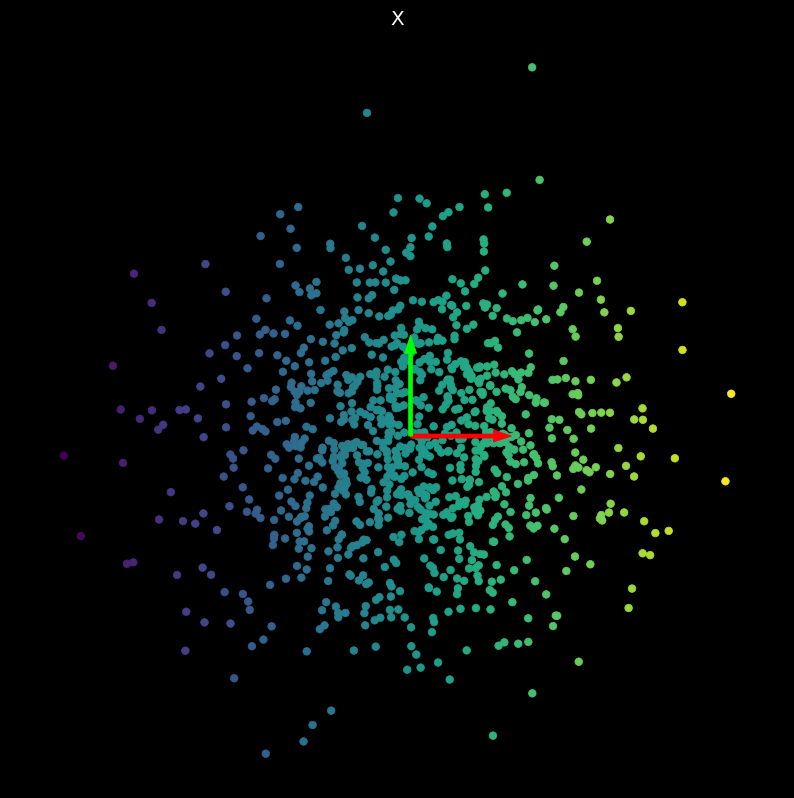

In [6]:
# generate some points in 2-D space
n_points = 1000
X = torch.randn(n_points, 2).to(device)
colors = X[:, 0]

show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2))).to(device)
plot_bases(OI)

# Visualizing Linear Transformations
- Generate a random matrix W (weights)

    $ W = U\begin{bmatrix}s_1 & 0\\0 & s_2\end{bmatrix}V^T$

- Compute $y = Wx$
- Larger singular values stretch the points
- Smaller singular values push them together
- $U,V$ rotate/reflect

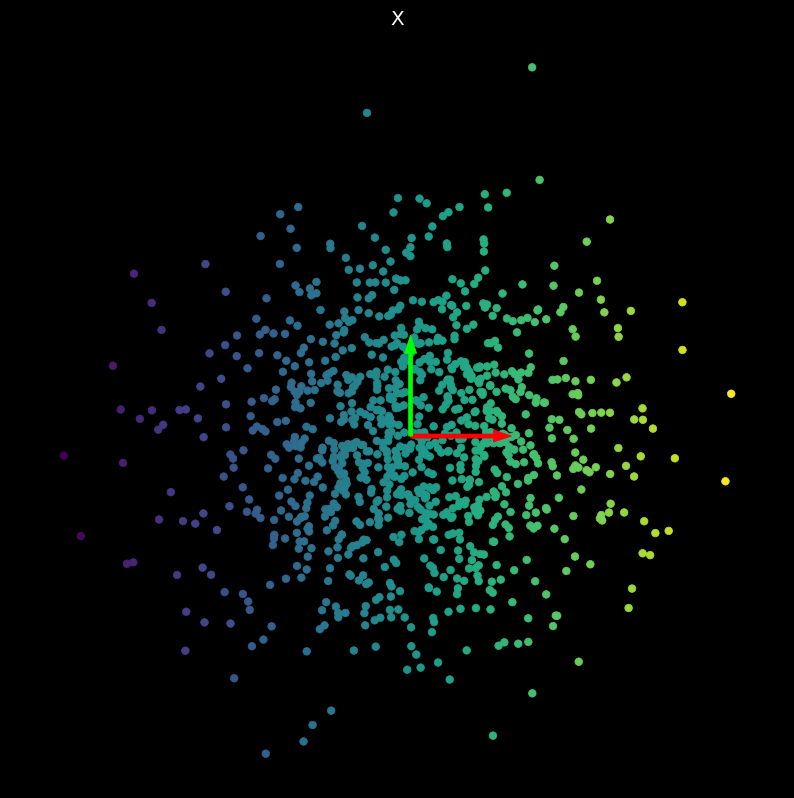

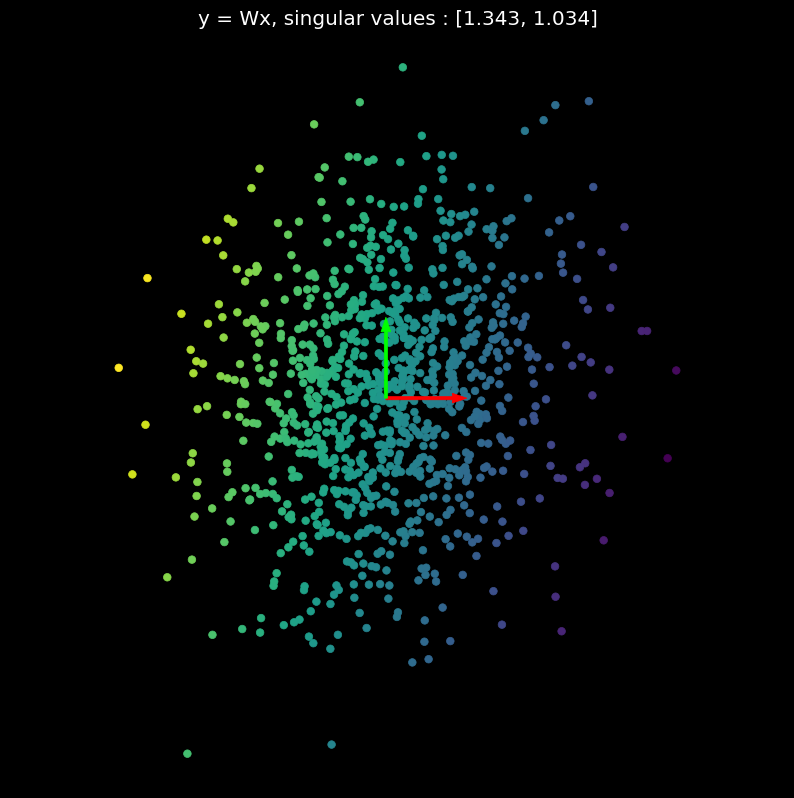

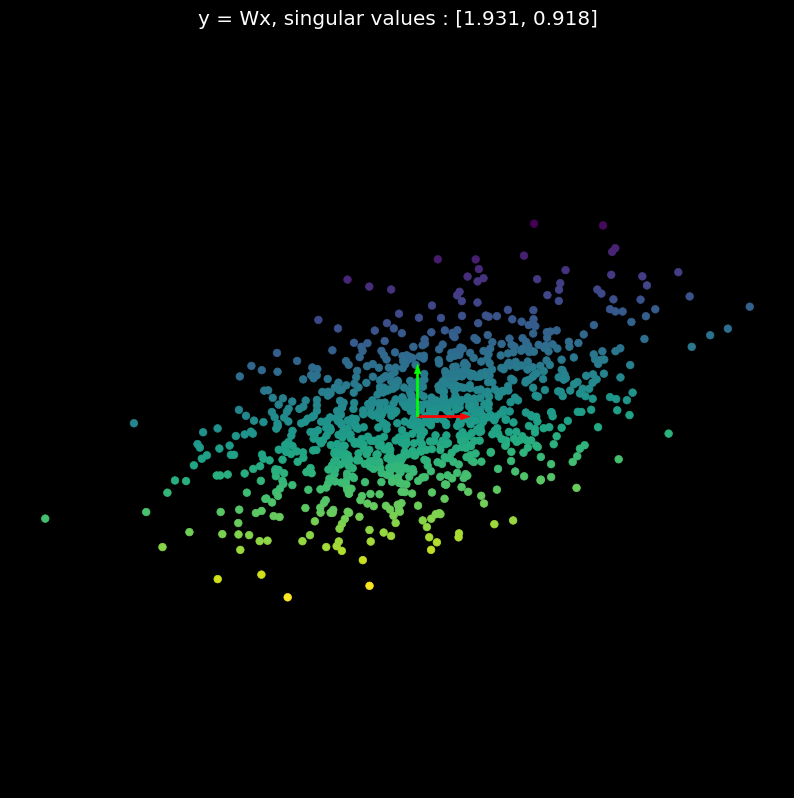

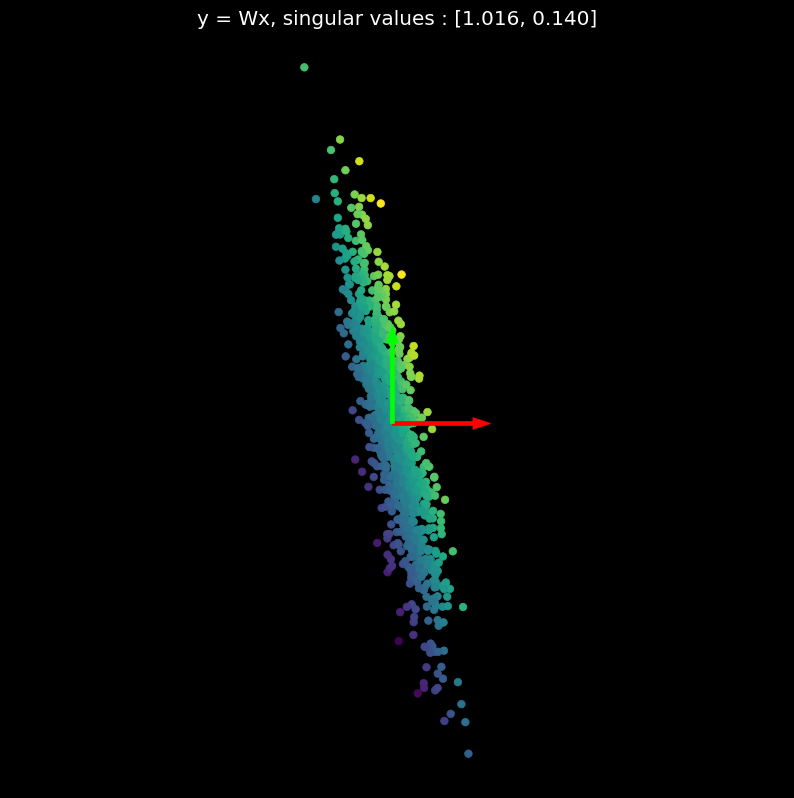

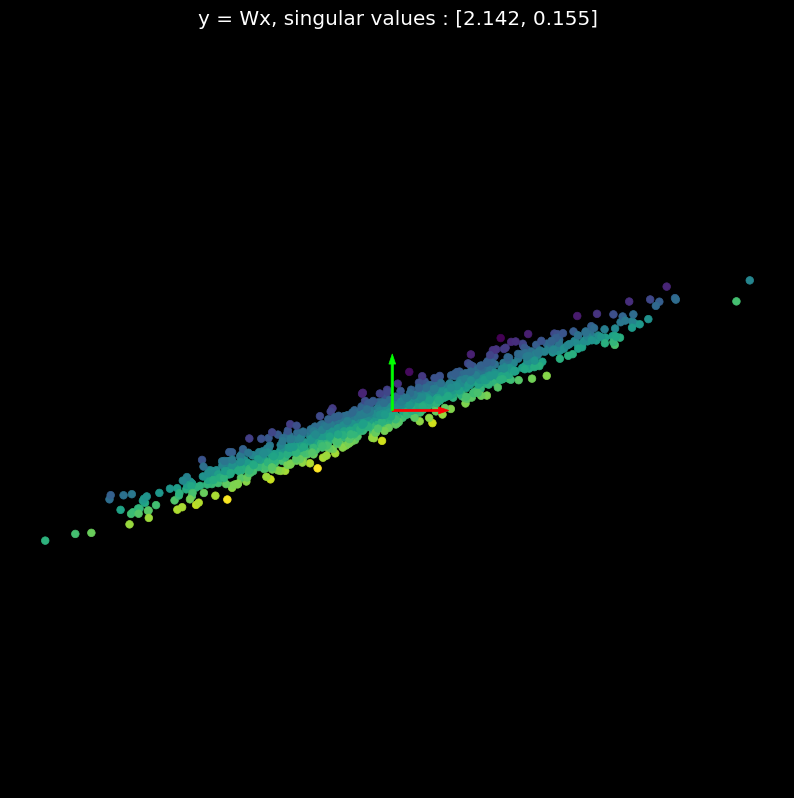

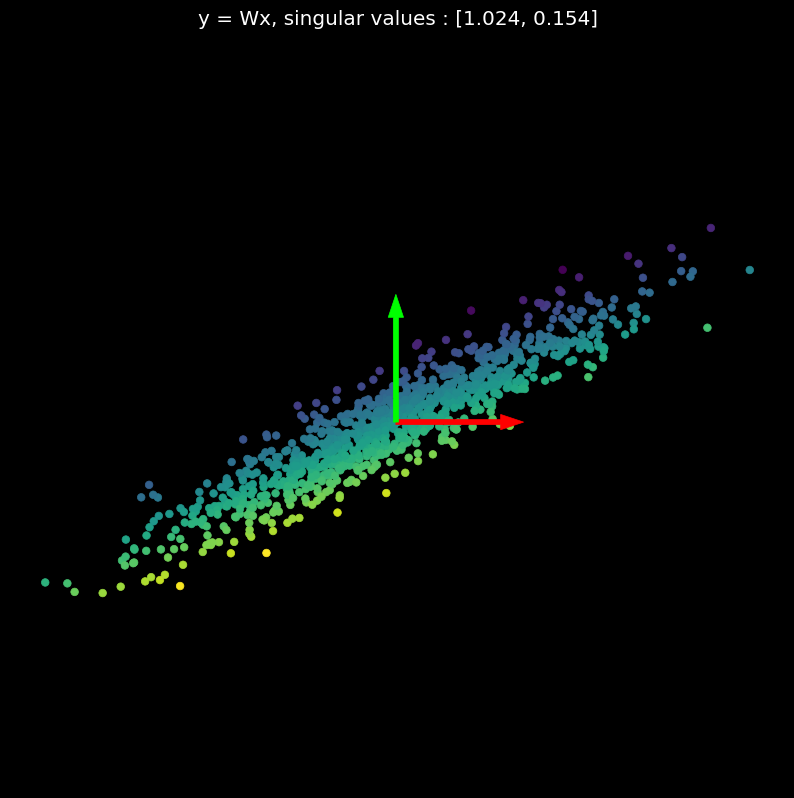

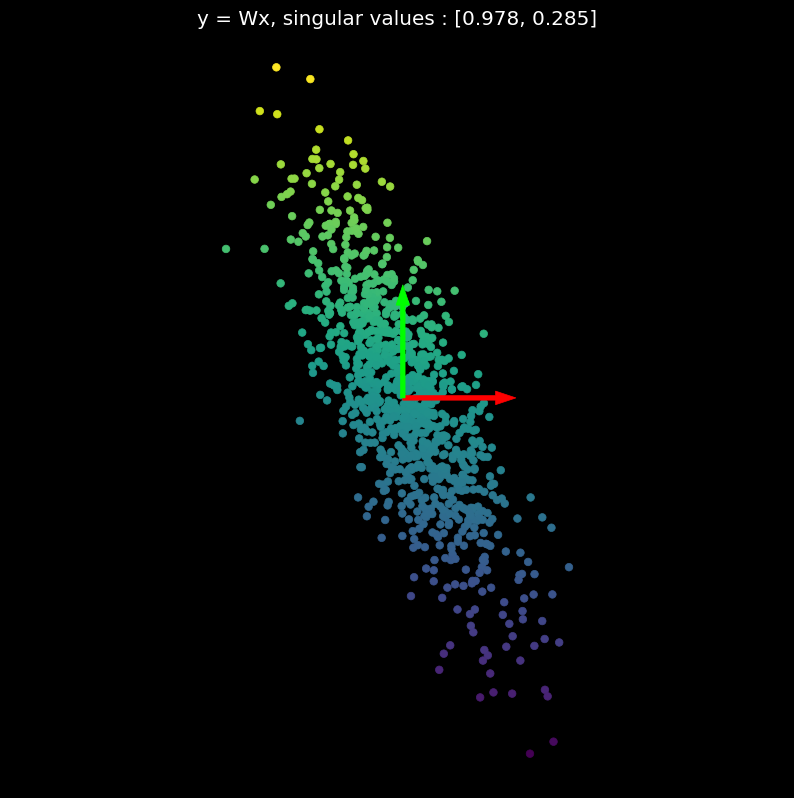

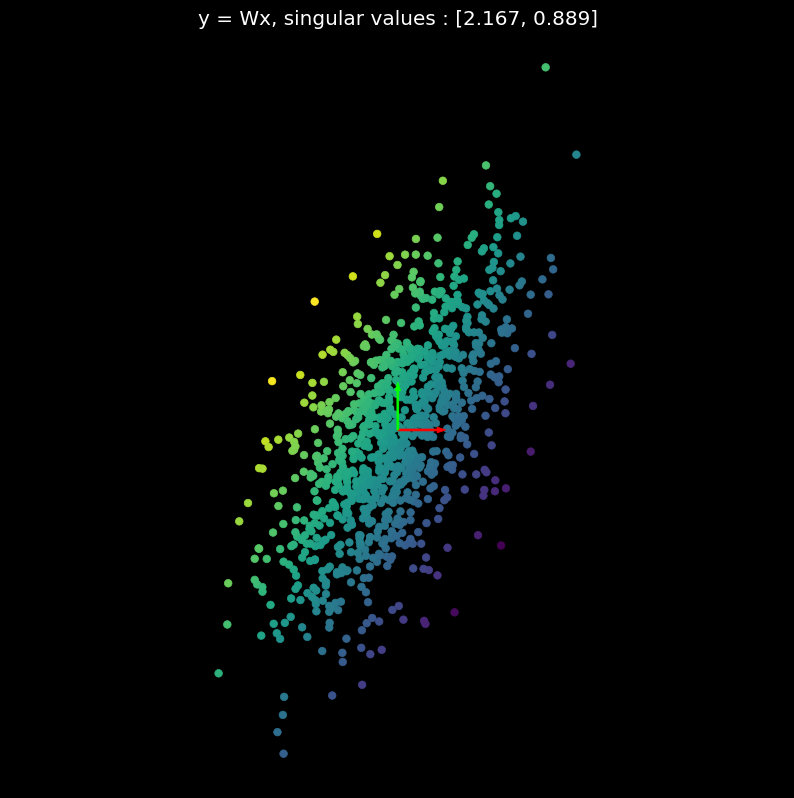

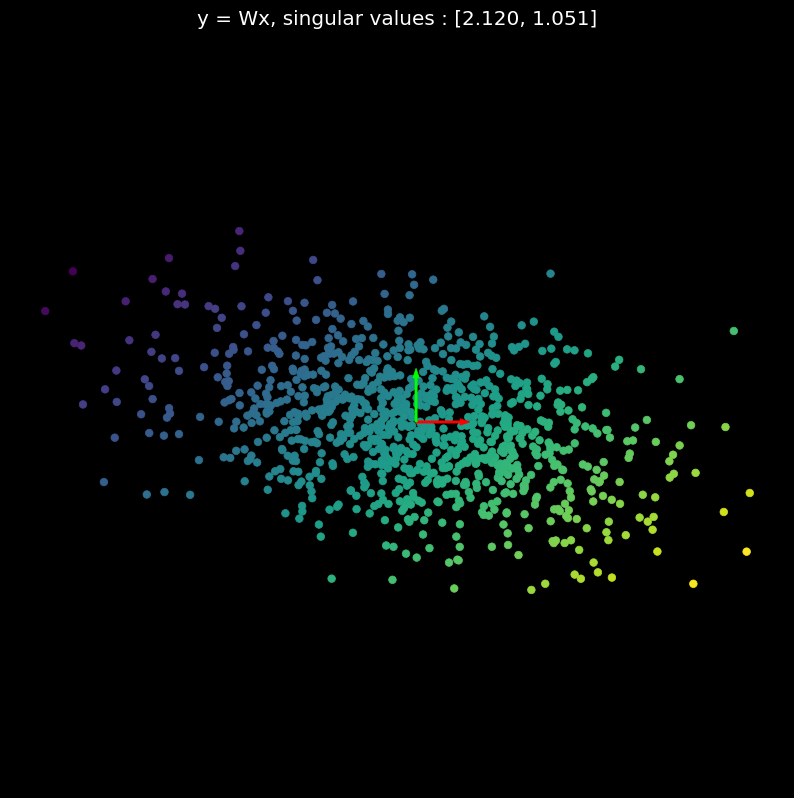

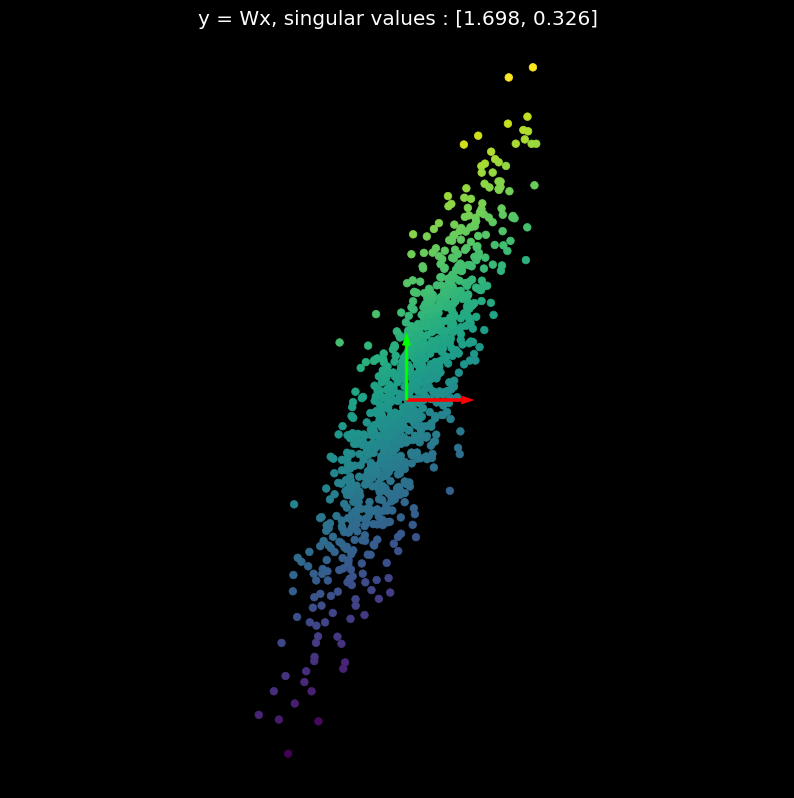

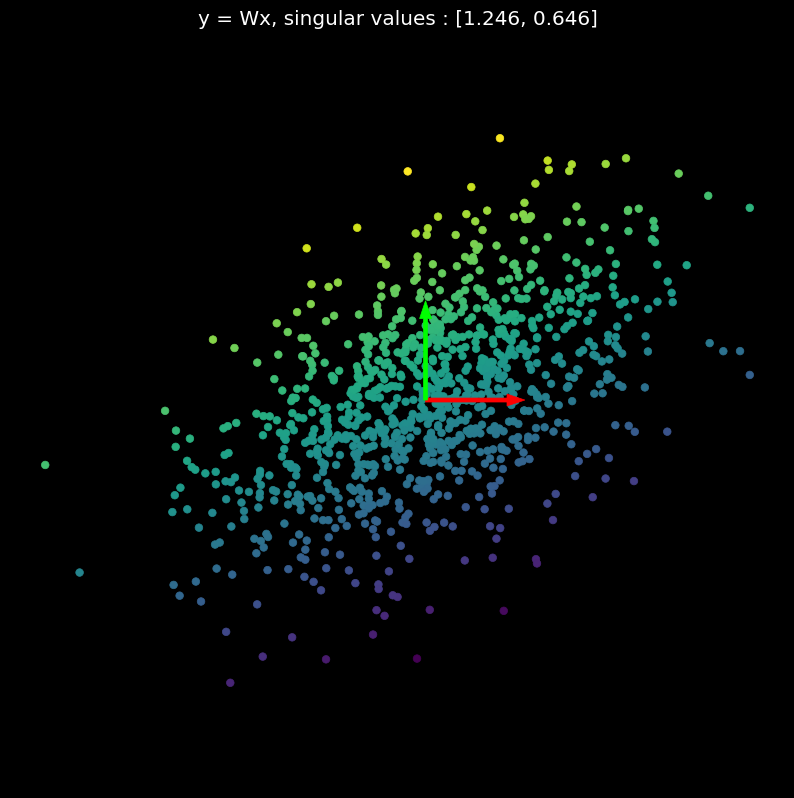

In [7]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

for i in range(10):
    # create a random matrix
    W = torch.randn(2, 2).to(device)
    # transform points
    Y = X @ W.t()
    # compute singular values
    U, S, V = torch.svd(W)
    # plot transformed points
    show_scatterplot(Y, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
    # transform the basis
    new_OI = OI @ W.t()
    # plot old and new basis
    plot_bases(OI)
#     plot_bases(new_OI)

## Non-linear Transform: Map Points to a square
- Linear transform can rotate, reflect, stretch and compress data, but cannot curve
- We need non-linear blocks for that
- can (approximately) map points to a square by first stretching out by a factor $s$, then squashing with $tanh$ function

    $ f(x) = \tanh\bigl(\begin{bmatrix}s & 0\\0 & s\end{bmatrix}x\bigr)$

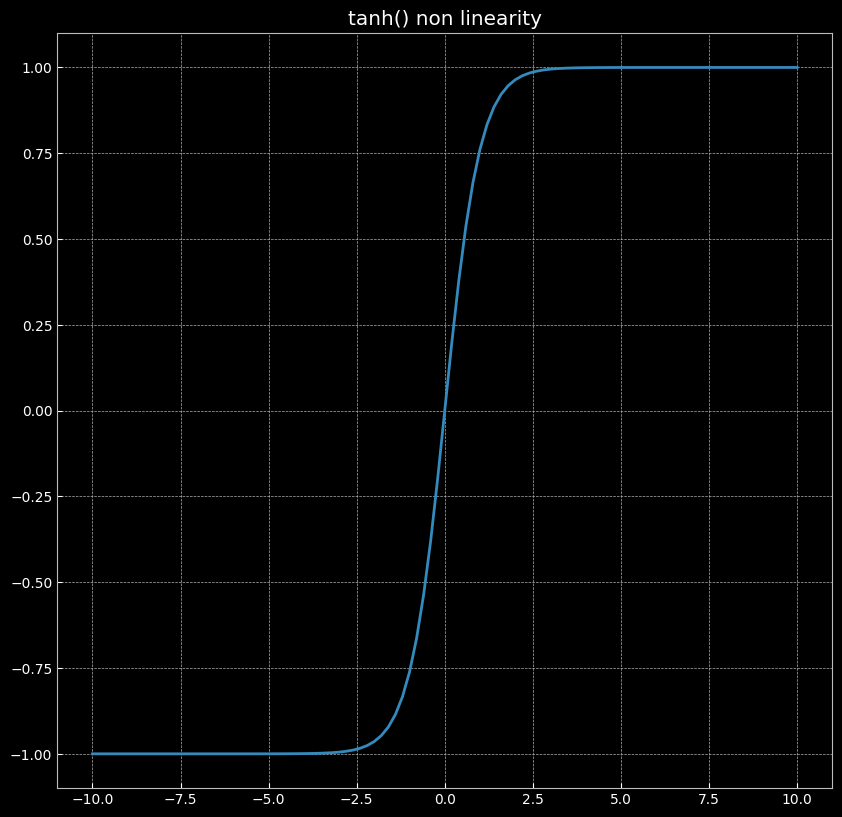

In [8]:
z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)
plot(z.numpy(), s.numpy())
title('tanh() non linearity');

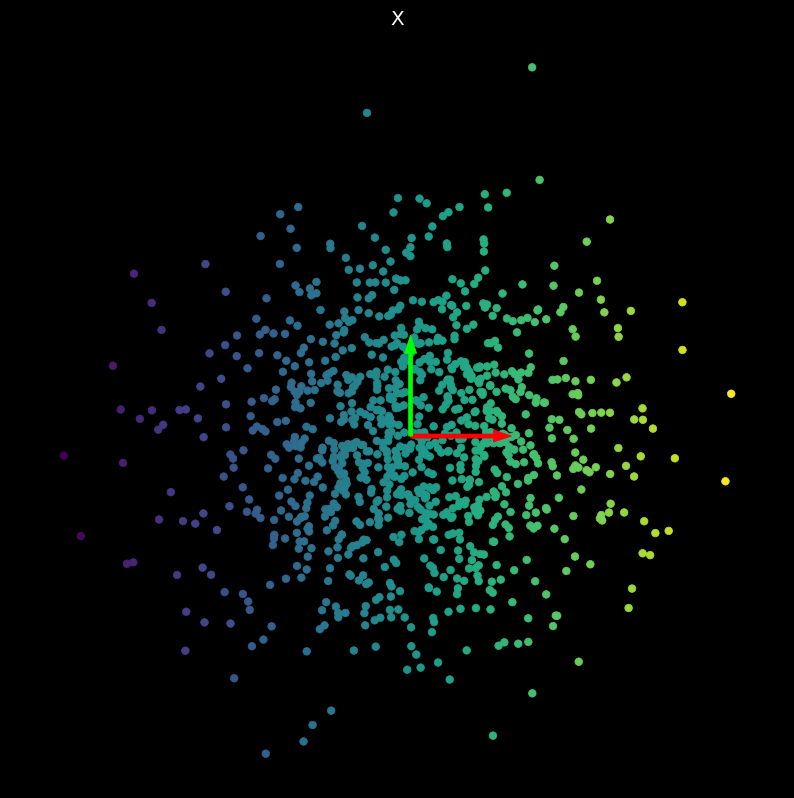

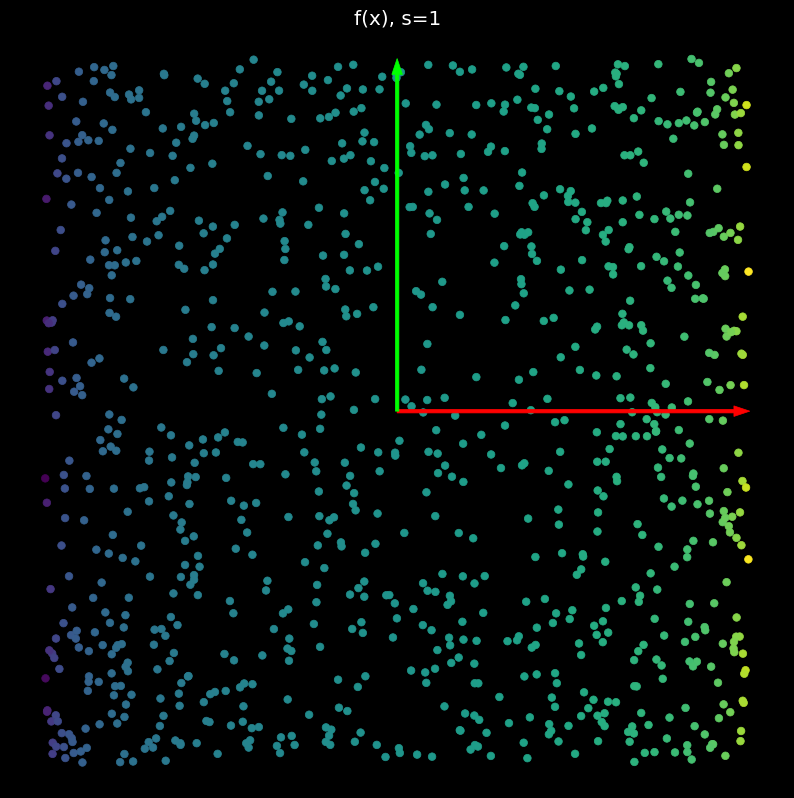

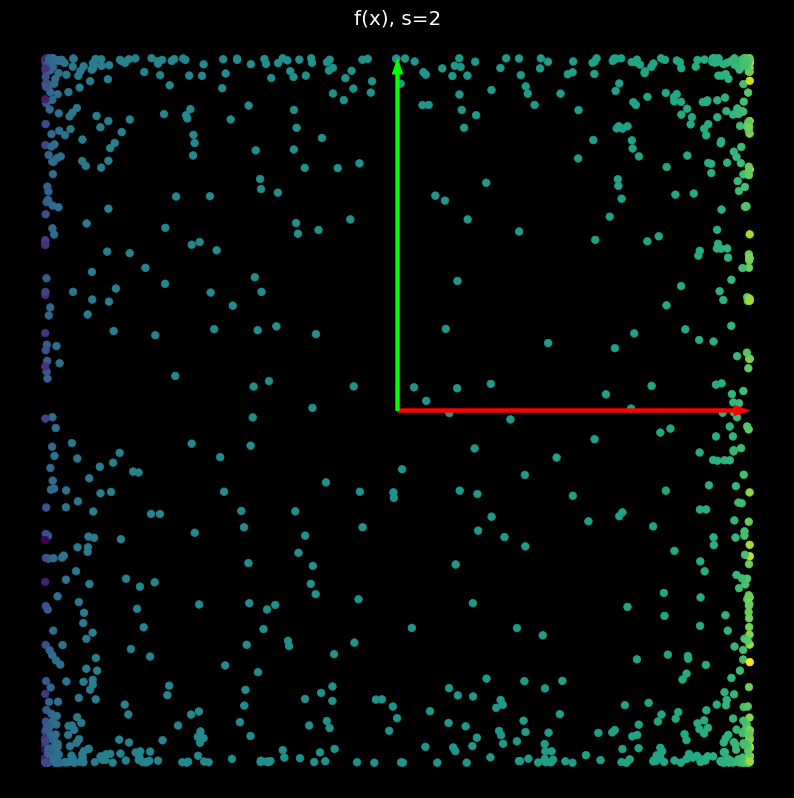

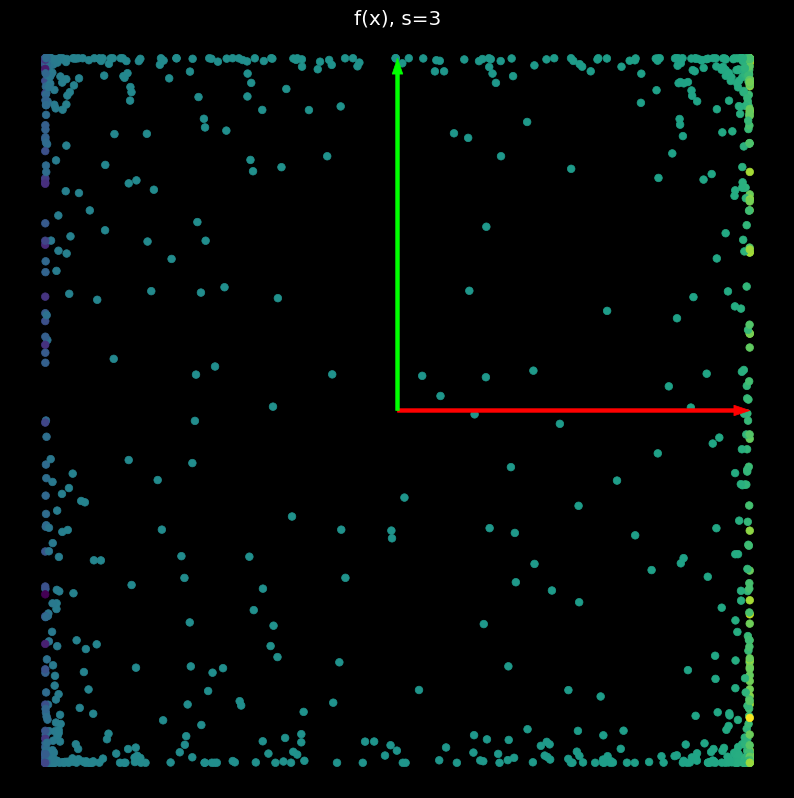

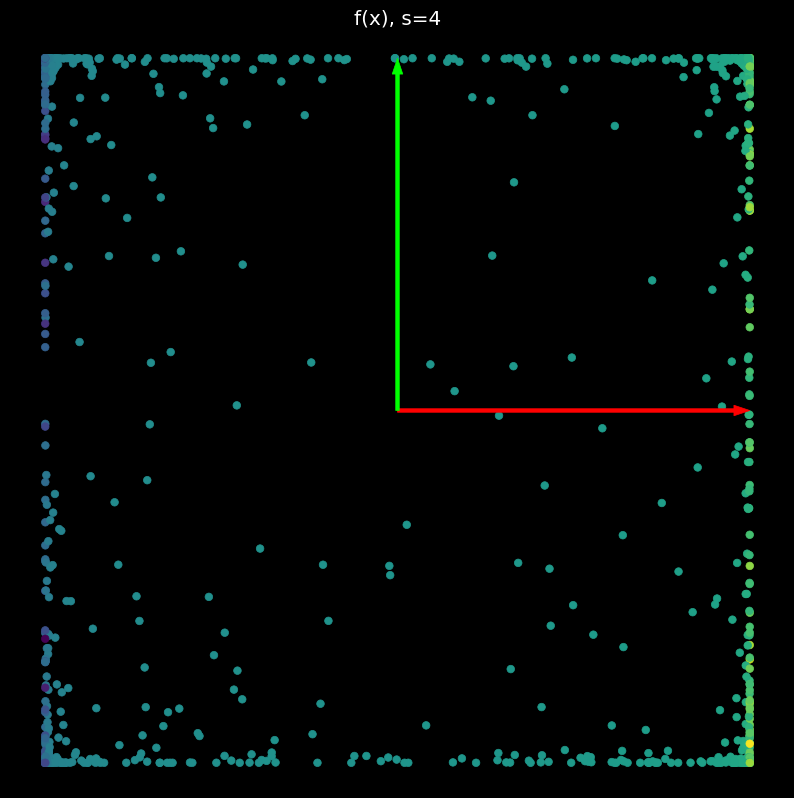

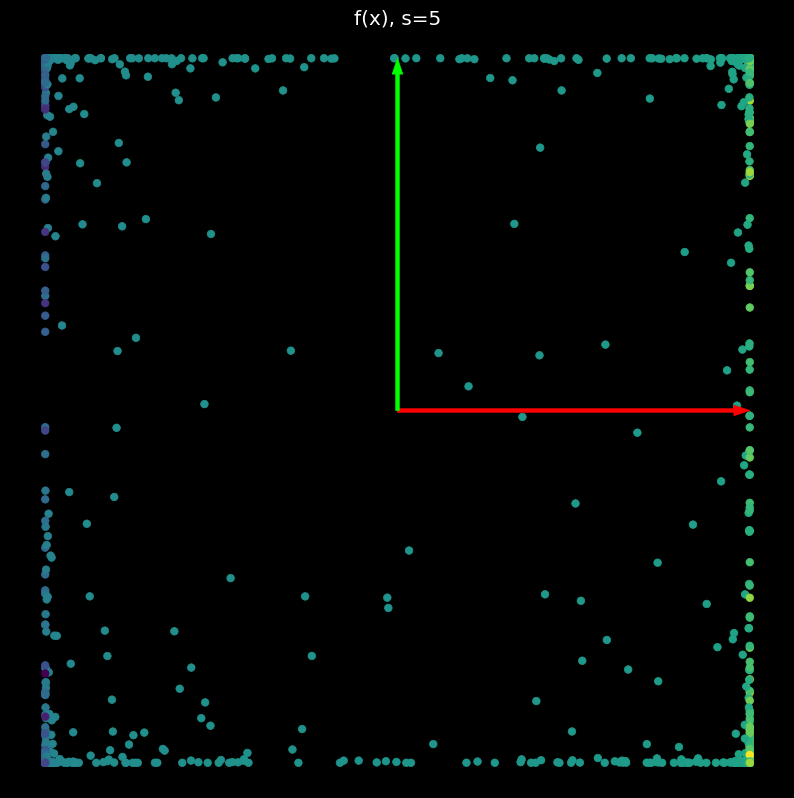

In [9]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = nn.Sequential(
        nn.Linear(2, 2, bias=False),
        nn.Tanh()
)

model.to(device)

for s in range(1, 6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    Y = model(X).data
    show_scatterplot(Y, colors, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)

## Visualize Functions Represented by Random Neural Networks

Neural nets just combine the two latter effects, linear and non linear transformation

Intuition: a neural net rotate and squash data

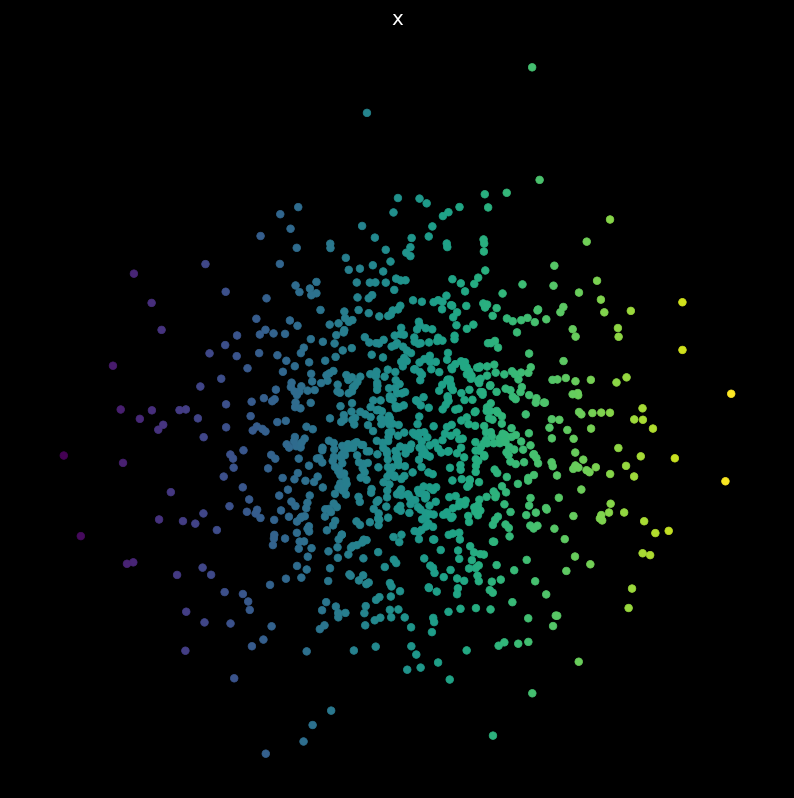

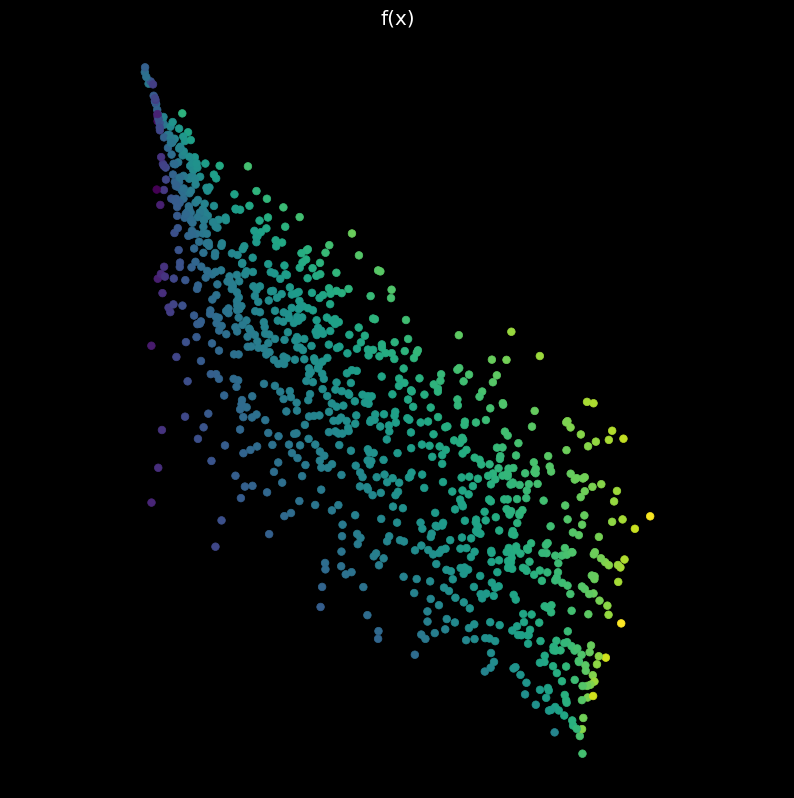

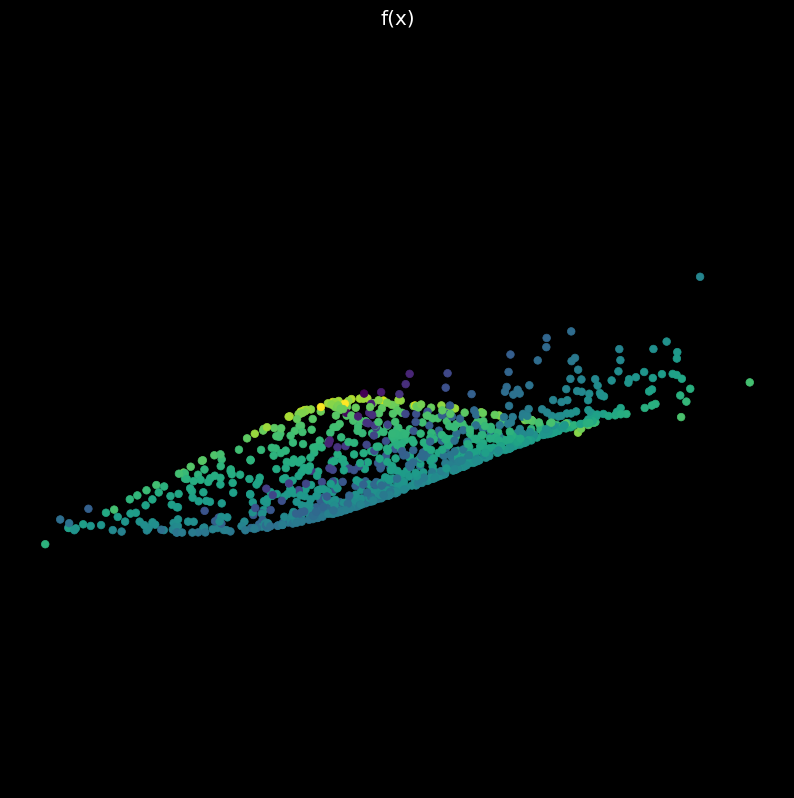

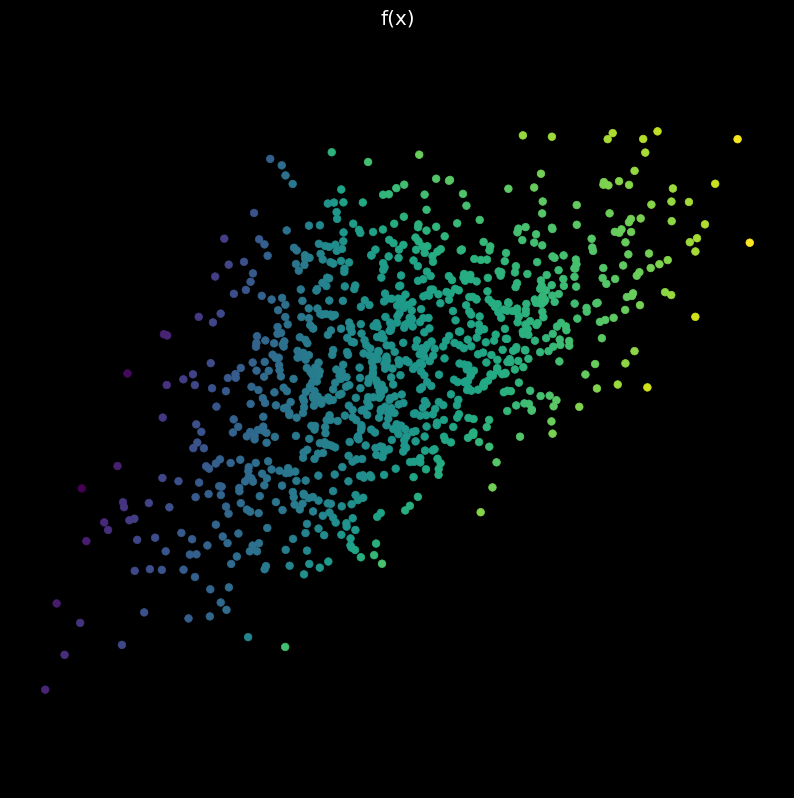

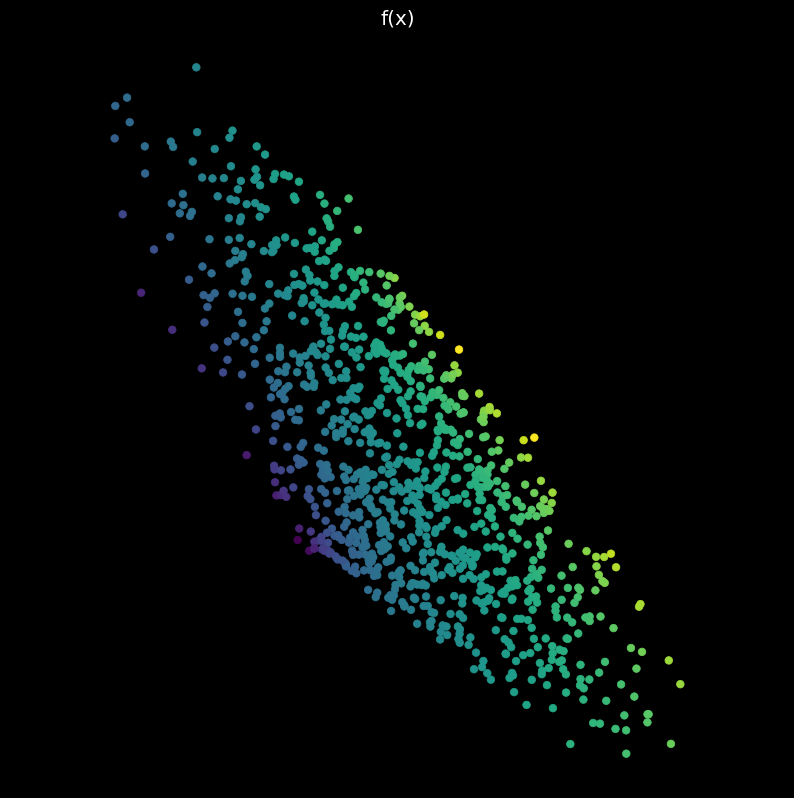

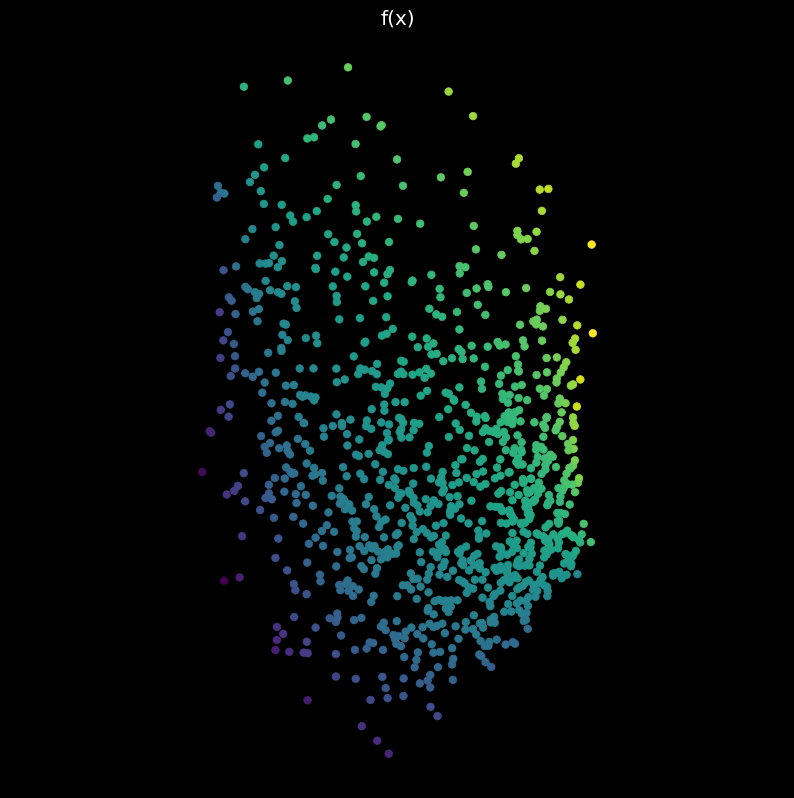

In [10]:
show_scatterplot(X, colors, title='x')
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
    # create 1-layer neural networks with random weights
    model = nn.Sequential(
            nn.Linear(2, n_hidden), 
            NL, 
            nn.Linear(n_hidden, 2)
        )
    model.to(device)
    with torch.no_grad():
        Y = model(X)
    show_scatterplot(Y, colors, title='f(x)')
#     plot_bases(OI)

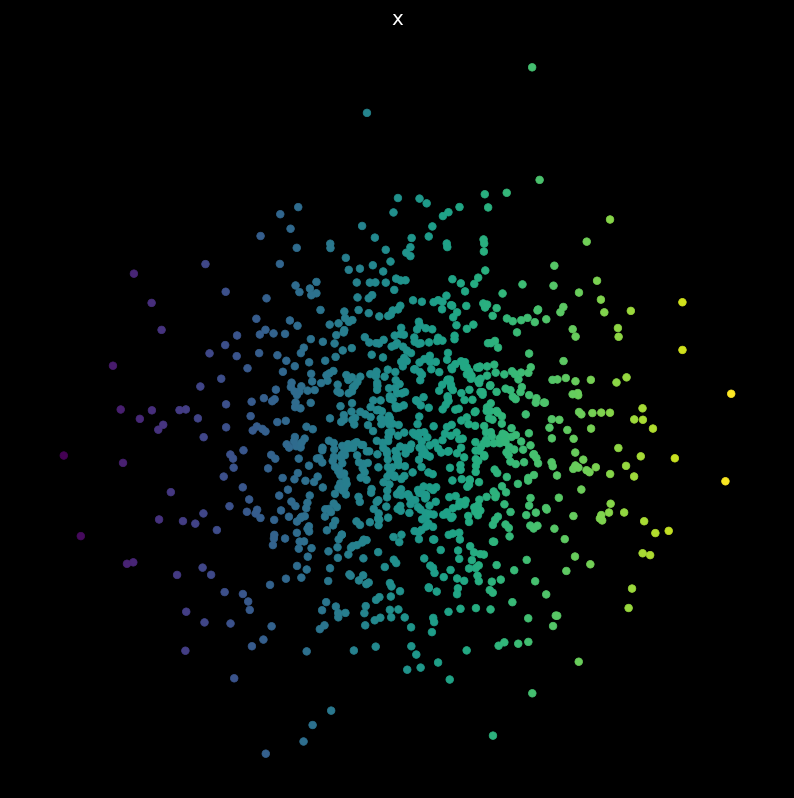

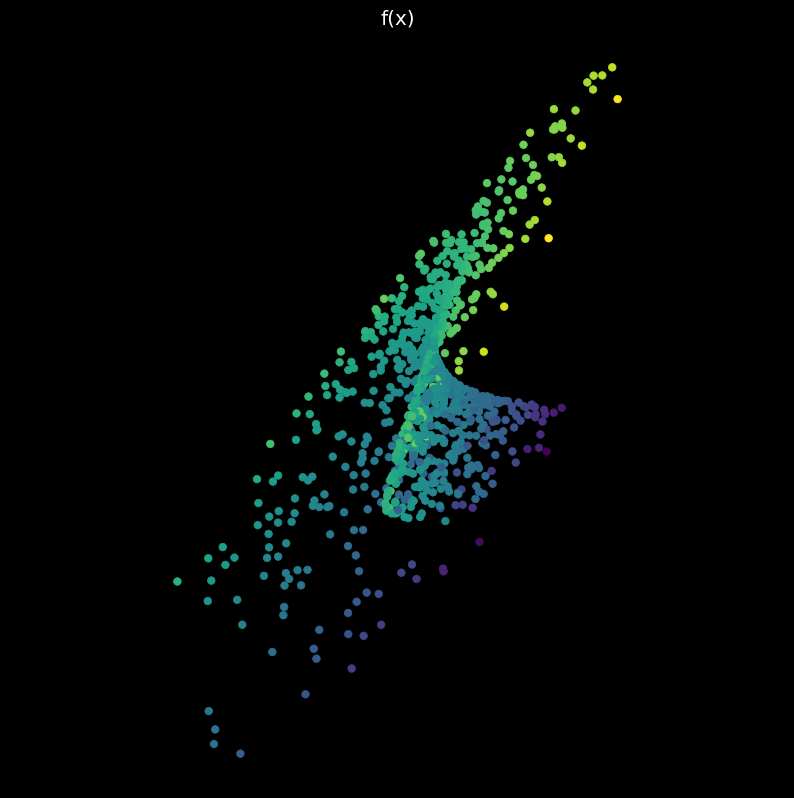

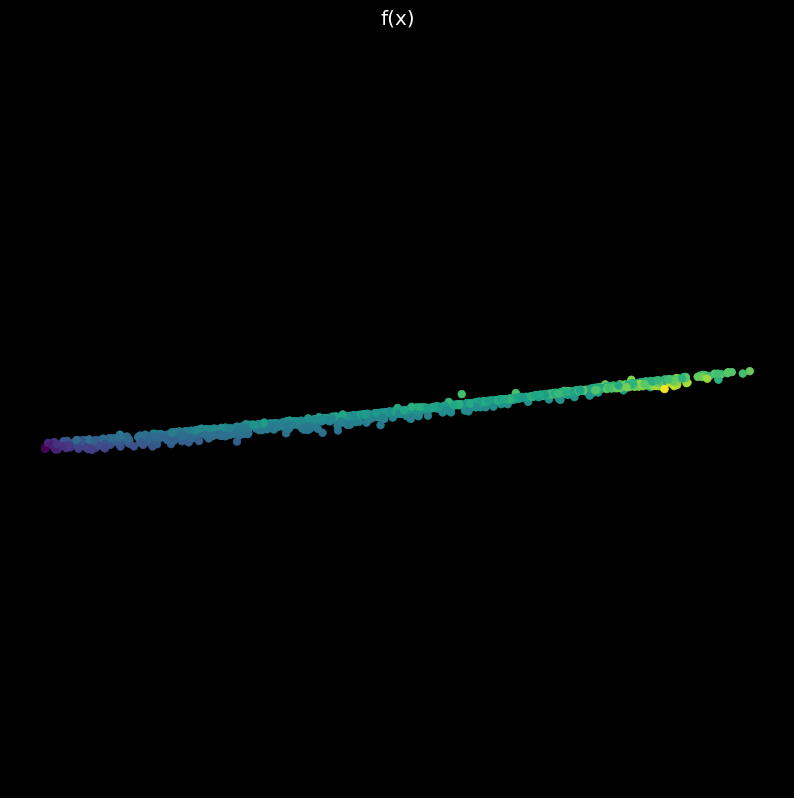

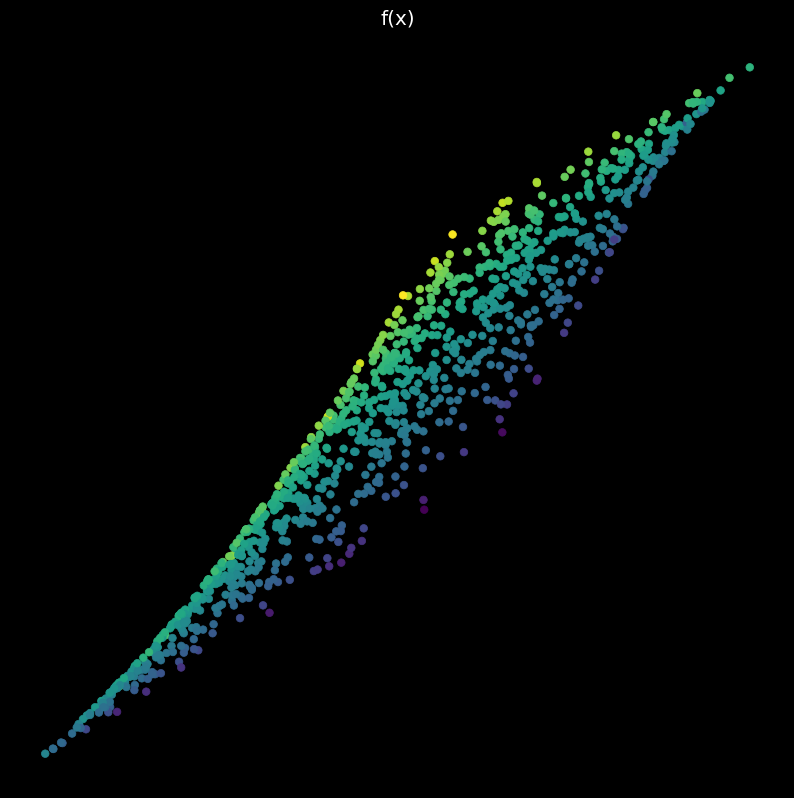

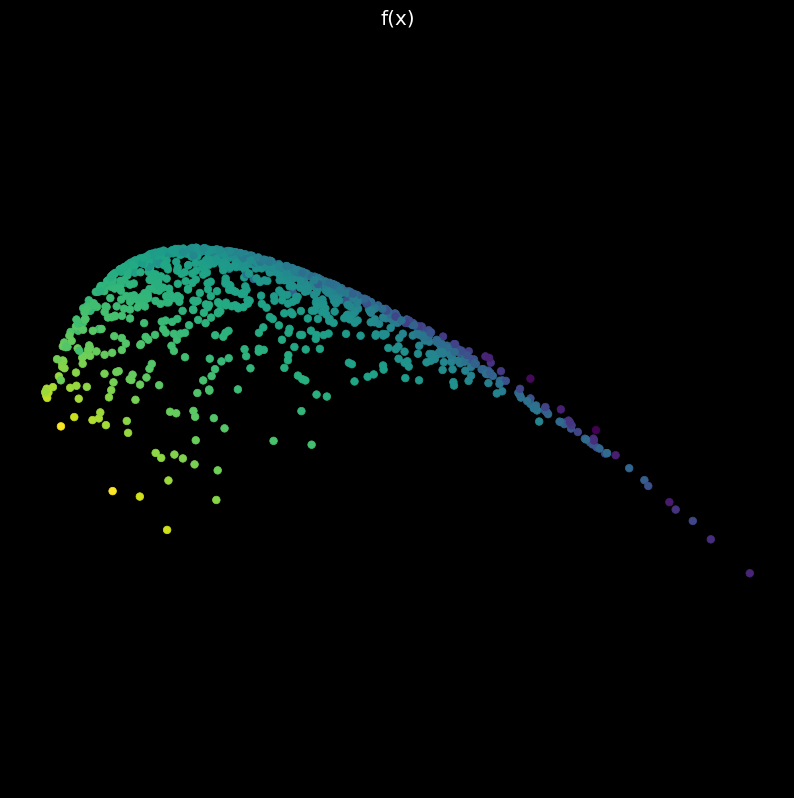

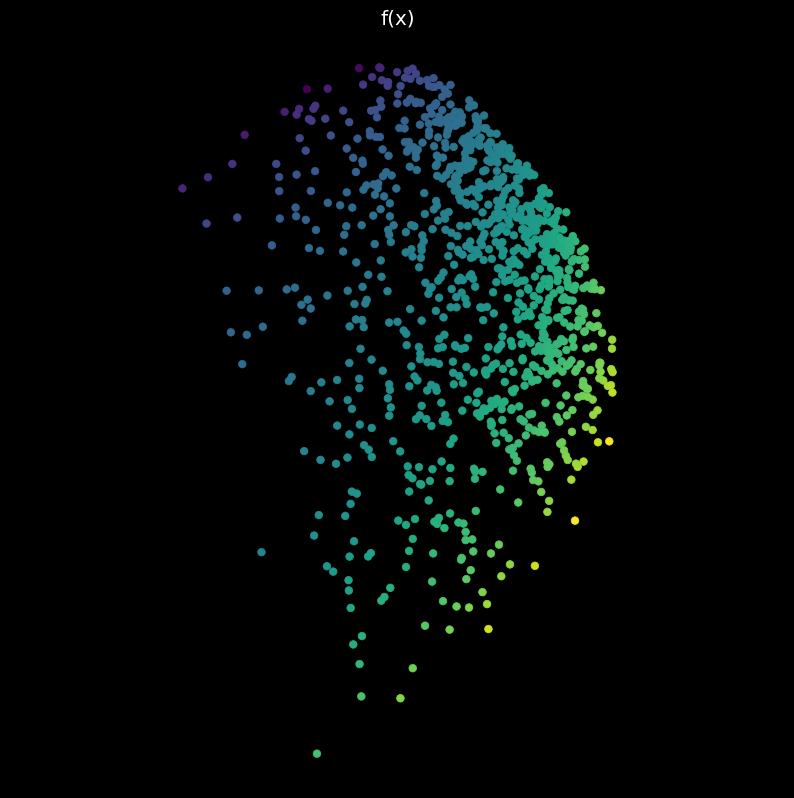

In [11]:
# deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
    model = nn.Sequential(
        nn.Linear(2, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, 2)
    )
    model.to(device)
    with torch.no_grad():
        Y = model(X).detach()
    show_scatterplot(Y, colors, title='f(x)')

